# PREDICTING WHETHER A PERSON HAS A CHRONIC KIDNEY DISEASE OF NOT

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df =  pd.read_csv(r'D:\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [125]:
df.shape

(400, 26)

In [126]:
columns = pd.read_csv(r'D:\data_description.txt', sep ='-')
columns= columns.reset_index()

In [127]:
columns.columns = ['cols','abb_col_name']
columns

,cols,abb_col_name
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [128]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [129]:
df.columns =  columns['abb_col_name'].values
df

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [130]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [131]:
features=['packed cell volume','white blood cell count','red blood cell count']

In [132]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors = 'coerce')
    
for feature in features:
    convert_dtype(df,feature)

In [133]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [134]:
df.drop('id', axis = 1 , inplace = True)

In [135]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [136]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [137]:
cat_col,num_col=extract_cat_num(df)

In [138]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [139]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [140]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values  


coronary artery disease has ['no' 'yes' '\tno' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'ckd\t' 'notckd'] values  




In [141]:

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [142]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




In [143]:
len(num_col)

14

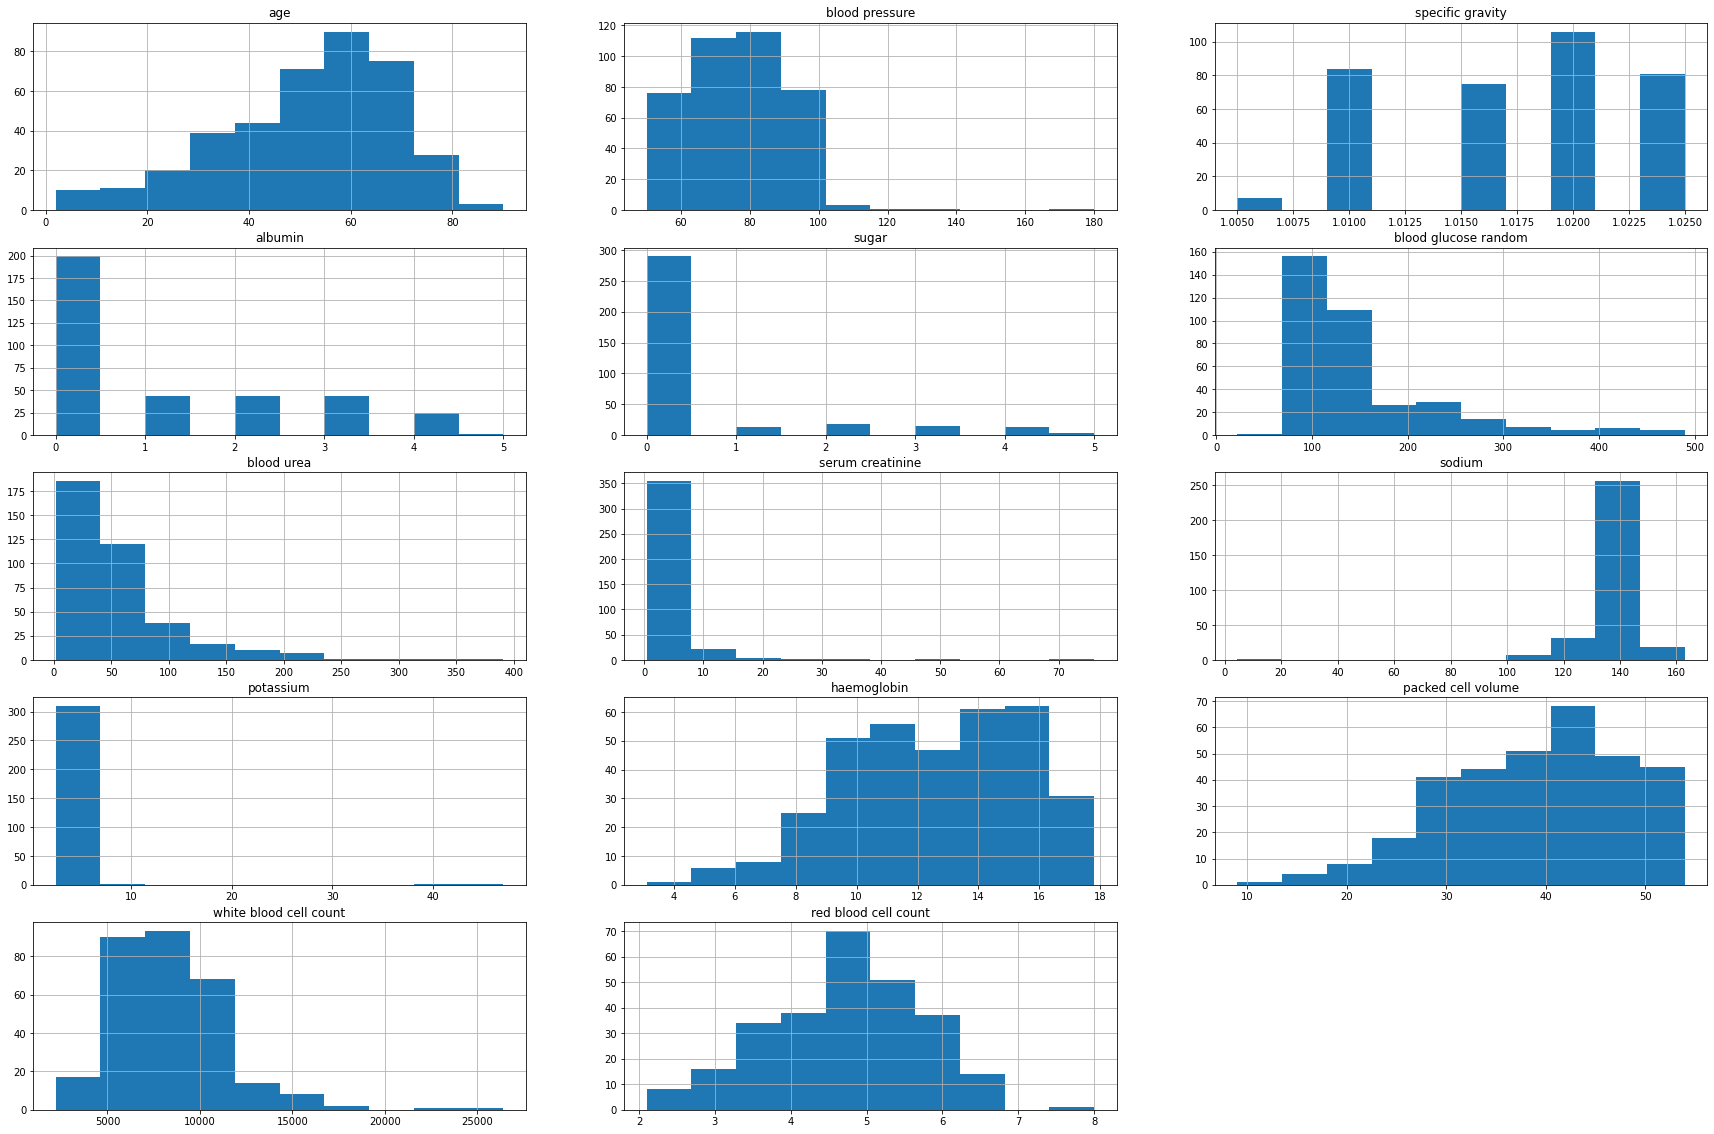

In [144]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1) 
    df[feature].hist()
    plt.title(feature)
    

In [145]:
len(cat_col)

11

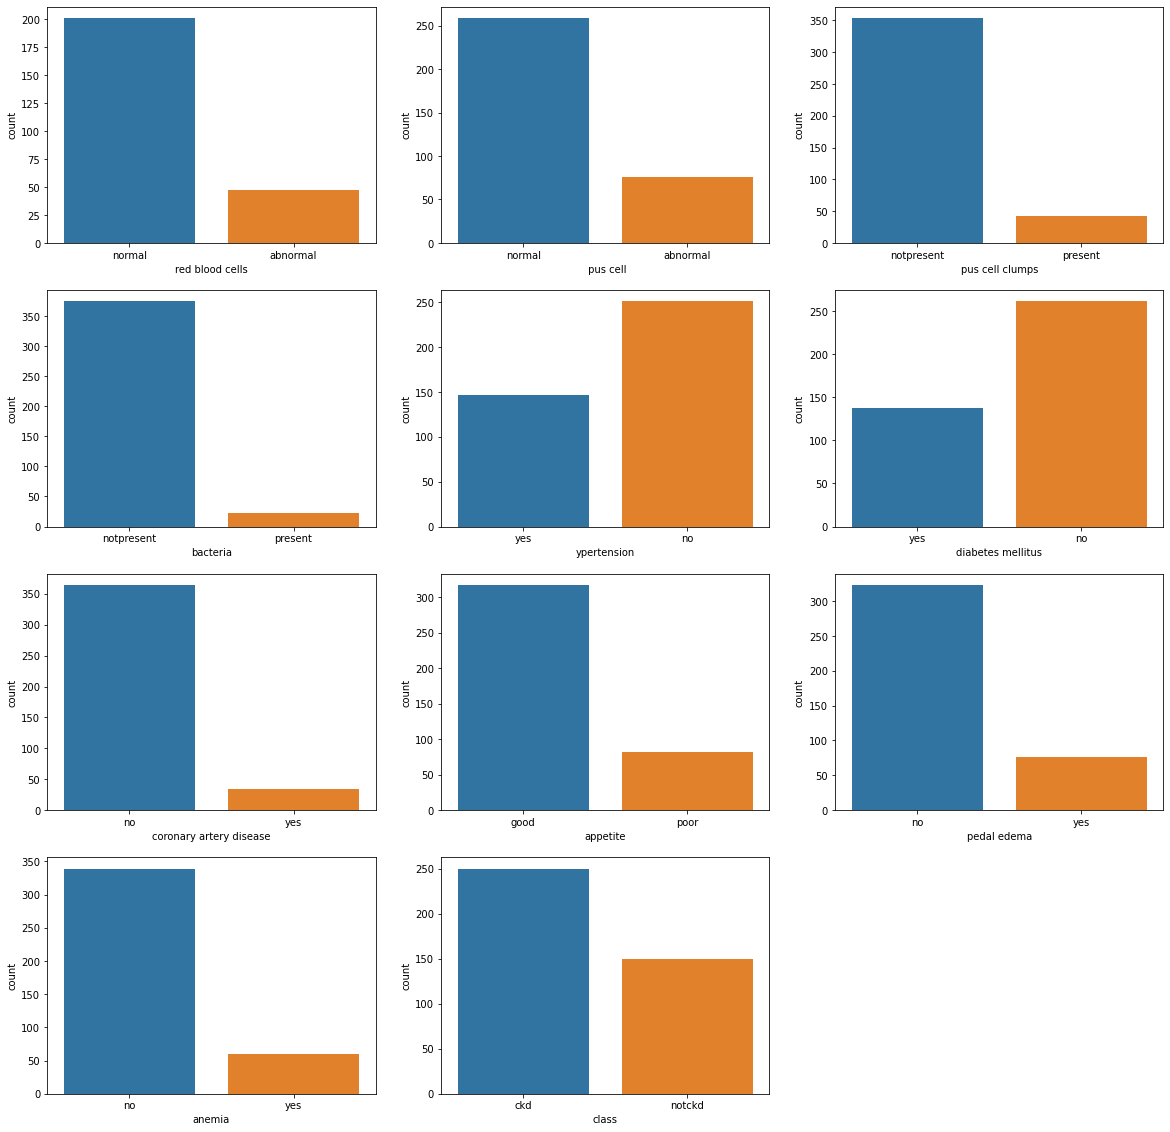

In [146]:
plt.figure(figsize= (20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

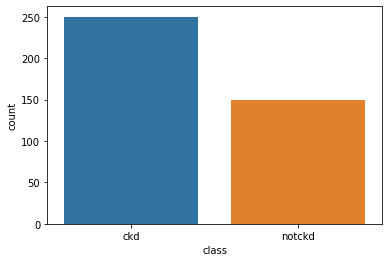

In [147]:
sns.countplot(df['class'])

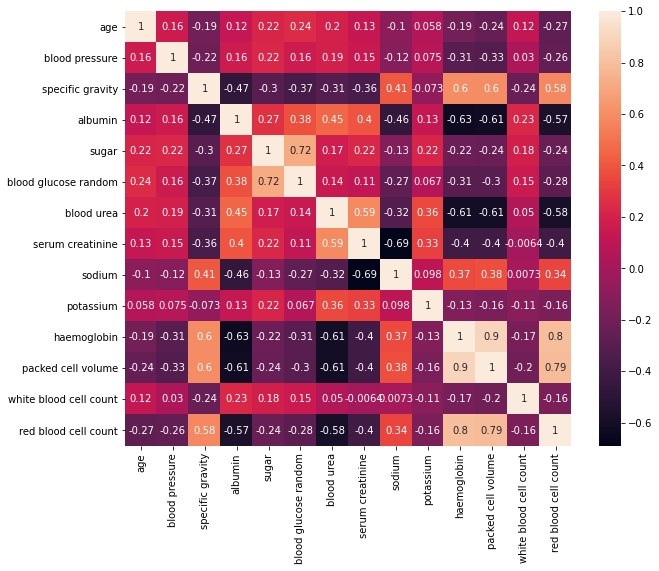

In [148]:
plt.figure(figsize = (10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot = True)

In [149]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [150]:
import plotly.express as px

In [151]:
px.violin(df,y = 'red blood cell count', x = 'class',color =  'class')

In [152]:
px.scatter(df,'haemoglobin','packed cell volume')

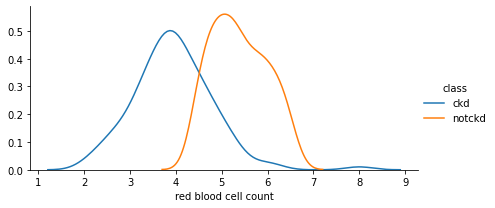

In [153]:
grid = sns.FacetGrid(df, hue = 'class',aspect = 2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

In [154]:
def violin(col):
    fig = px.violin(df, y = col, x = 'class',color = 'class', box =True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [155]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue= 'class',aspect =2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

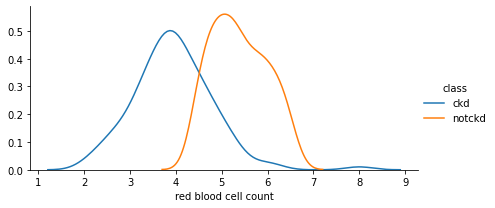

In [156]:
kde_plot('red blood cell count')

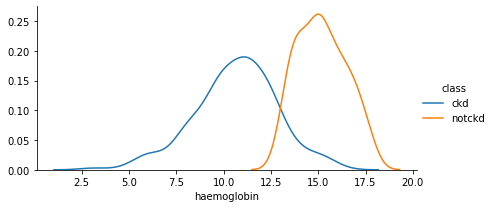

In [157]:
kde_plot('haemoglobin')

In [158]:
scatters('red blood cell count', 'packed cell volume')

In [159]:
scatters('red blood cell count', 'haemoglobin')

In [160]:
scatters('haemoglobin','packed cell volume')

1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
disease(i.e ckd).
2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
disease(i.e nockd).

In [161]:
violin('red blood cell count')

In [162]:
violin('packed cell volume')

Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [163]:
scatters('red blood cell count','albumin')

Clearly, albumin levels of above 0 affect ckd largely

In [164]:
df.isna().sum().sort_values(ascending = False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

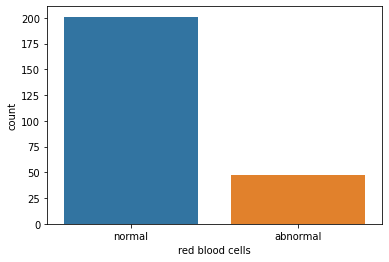

In [165]:
sns.countplot(df['red blood cells'])

In [166]:
data =  df.copy()

In [167]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [168]:
data['red blood cells'].dropna().sample()

171    normal
Name: red blood cells, dtype: object

In [169]:
data['red blood cells'].isnull().sum()

152

In [170]:
random_sample=data['red blood cells'].dropna().sample(152)
random_sample

299      normal
73     abnormal
367      normal
114    abnormal
343      normal
         ...   
100    abnormal
313      normal
186      normal
258      normal
33     abnormal
Name: red blood cells, Length: 152, dtype: object

In [171]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [172]:
random_sample.index

Int64Index([299,  73, 367, 114, 343, 259, 284, 107, 116,  48,
            ...
            318, 382, 246, 181,  92, 100, 313, 186, 258,  33],
           dtype='int64', length=152)

In [173]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [174]:
data.loc[data['red blood cells'].isnull(), 'red blood cells'] =  random_sample

In [175]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [176]:
data['red blood cells'].isnull().sum()

0

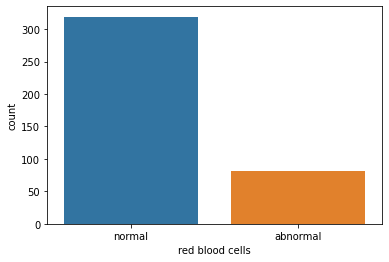

In [177]:
sns.countplot(data['red blood cells'])

In [178]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample


In [179]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [180]:
for col in num_col:
    Random_value_imputation(col)

In [181]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [182]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [183]:
Random_value_imputation(' pus cell')

In [184]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [185]:
def impute_mode(feature):
    mode =  data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [186]:
for col in cat_col:
    impute_mode(col)

In [187]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [188]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [189]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [190]:
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [191]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,81.0,...,38.0,6000.0,5.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [193]:
ind_col = [col for col in data.columns if col!= 'class']
dep_col = 'class'

In [194]:
X = data[ind_col]
y = data[dep_col]
print(X)

      age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                0   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

      pus cell  pus cell clumps  bacter

In [195]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [196]:
ordered_rank_features = SelectKBest(score_func =chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [197]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000002AD5F9F99D0>)

In [198]:
ordered_feature.scores_

array([1.17297010e+02, 8.29658930e+01, 5.79964779e-03, 2.38610587e+02,
       1.01694815e+02, 1.00231975e+01, 1.21815054e+01, 2.52000000e+01,
       1.32000000e+01, 2.43939758e+03, 2.08292519e+03, 3.40729652e+02,
       3.09157133e+01, 7.23370291e-01, 1.24393486e+02, 3.12130280e+02,
       1.34634342e+04, 1.91116241e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [199]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,117.297010
1,82.965893
2,0.005800
3,238.610587
4,101.694815
5,10.023197
6,12.181505
7,25.200000
8,13.200000
9,2439.397581


In [200]:
dfcols =  pd.DataFrame(X.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [201]:
features_rank = pd.concat([dfcols, datascores],axis = 1)
features_rank

,0,Score
0,age,117.297010
1,blood pressure,82.965893
2,specific gravity,0.005800
3,albumin,238.610587
4,sugar,101.694815
5,red blood cells,10.023197
6,pus cell,12.181505
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2439.397581


In [202]:
features_rank.nlargest(10,'Score')
features_rank.columns=['features','Score']
features_rank

,features,Score
0,age,117.297010
1,blood pressure,82.965893
2,specific gravity,0.005800
3,albumin,238.610587
4,sugar,101.694815
5,red blood cells,10.023197
6,pus cell,12.181505
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2439.397581


In [203]:
selected_columns = features_rank.nlargest(10,'Score')['features'].values
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [204]:
X_new=data[selected_columns]
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,81.0,18.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [205]:
X_new.shape

(400, 10)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test =  train_test_split(X_new, y,train_size = 0.75 )

In [207]:
print(X_train.shape)

(300, 10)


In [208]:
print(X_test.shape)

(100, 10)


In [209]:
y_train.value_counts()

0    190
1    110
Name: class, dtype: int64

In [210]:
!pip install xgboost

In [211]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [212]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [214]:
from sklearn.model_selection import RandomizedSearchCV

In [215]:
classifier=XGBClassifier()

In [218]:
random_search = RandomizedSearchCV( classifier , param_distributions = params, n_iter  = 5 ,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [219]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    3.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    4.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.0s finished
C:\Users\91847\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [220]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [222]:
classifier.fit(X_train,y_train)

[00:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
y_predict  = classifier.predict(X_test)

In [225]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [229]:
confusion = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[56  4]
 [ 2 38]]


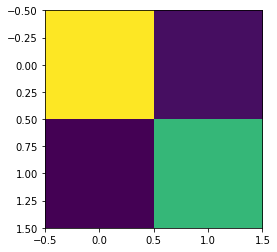

In [230]:
plt.imshow(confusion)

In [232]:
accuracy_score(y_test, y_predict)

0.94